<a href="https://colab.research.google.com/github/MochamadPhilliaWibowo/Machine-Learning-Class/blob/main/Tugas%20Week%209/Google%20Colab/Tugas_Lecture_9_BinaryClassificationNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mochamad Phillia Wibowo

NIM : 1103204191

Kelas : Machine Learning (TK-44-G04)

Tugas 9 Neural Network pada dataset housepricedata.csv

Dataset : https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view

# Memuat Library

In [9]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Menghubungkan GColab dengan GDrive

In [1]:
# Modul untuk menghubungkan Google Drive dengan Colab.
from google.colab import drive

# Menghubungkan Google Drive dengan Colab.
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Memuat dan Menampilkan Data

In [10]:
#Membaca file CSV yang berisi data ke dalam sebuah DataFrame
data = pd.read_csv('/content/gdrive/MyDrive/Dataset/housepricedata.csv')

# Tampilkan 5 baris pertama dataset
print("\n5 Baris Pertama Dataset:")
data.head()


5 Baris Pertama Dataset:


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


# Preprocessing

In [11]:
dataset = data.values

In [12]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [13]:
X = data.drop(columns=['AboveMedianPrice'])
y = data['AboveMedianPrice']

In [14]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [16]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [17]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [18]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Membuat Arsitektur Neural Network

In [19]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [20]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train Model

In [21]:
history = model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 13ms/step - loss: 0.6851 - accuracy: 0.6350 - val_loss: 0.6797 - val_accuracy: 0.6712
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6771 - accuracy: 0.6751 - val_loss: 0.6716 - val_accuracy: 0.6941
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6706 - accuracy: 0.6331 - val_loss: 0.6650 - val_accuracy: 0.6895
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6650 - accuracy: 0.6341 - val_loss: 0.6590 - val_accuracy: 0.6758
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6597 - accuracy: 0.6468 - val_loss: 0.6530 - val_accuracy: 0.6667
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6543 - accuracy: 0.6507 - val_loss: 0.6469 - val_accuracy: 0.6621
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6488 - accuracy: 0.6595 - val_loss: 0.6407 - val_accuracy: 0.7032
Epoch 8/100


# Evaluasi

In [29]:
# Evaluasi model pada data testing
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Testing Loss:", loss)
print("Testing Accuracy:", accuracy)

Testing Loss: 0.2518540024757385
Testing Accuracy: 0.8995434045791626


# Visualisasi

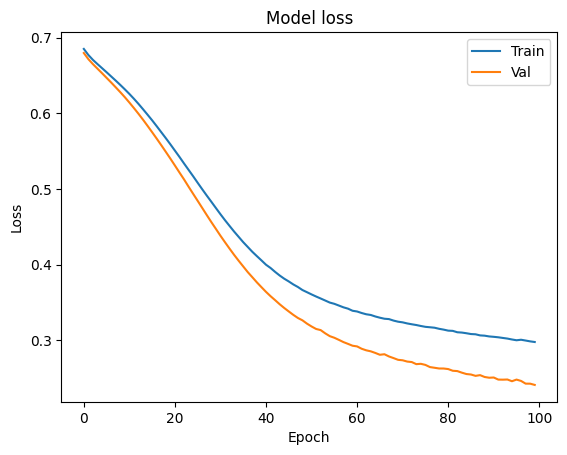

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

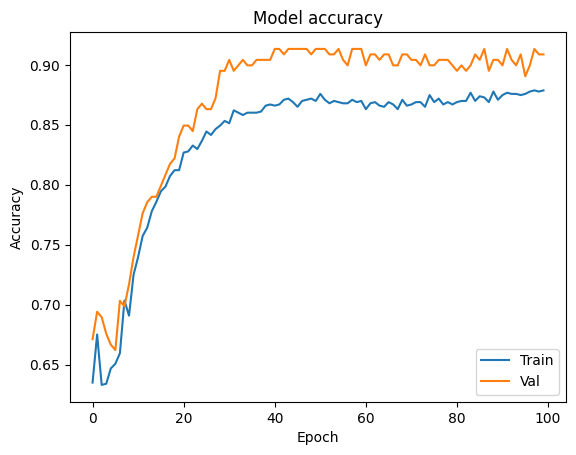

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()